# Deep Learning & Artificial Intelligence
## Neural Networks Building Blocks - Loss Functions, Optimizers, and Activations
### Dr. Jie Tao, Fairfield University

Before you proceed with this lecture, you should read Chapter 4 on the textbook, which reviews the fundamentals of ML.

In this lecture, we cover the following topics:
- Loss Functions
- Optimizers
- Activations
- Regularizations

## Loss Functions

- As said before, the selection of loss functions largely dependes on the analytical problem
  - Loss function calculates the __error__, which is the difference between the predicted value $\hat{y}$ and actual value $y$;
  - In other words, loss values are used to calculate __gradients__, which we can used to update the weights in the NN;
- Below animation illustrated how a loss function works

![loss function](https://machinelearningknowledge.ai/wp-content/uploads/2020/10/Loss_Function.gif)

### `keras` Loss Functions for Binary Classification

- As said before, in binary classification problems, the most popular loss functions is `binary_crossentropy`
- Keep in mind that in NN, the predicted $\hat{y} \in [0,1]$ - which is a real decimal number between 0 and 1, where as $y$ is either 0 or 1
- In essence, `binary_crossentropy` is built on __Negative Log-Likelihood__ (NLL), which is defined by:

$$ J(\hat{y}, y) = -\frac{1}{n}\sum_{i=0}^n{[y_i \log(\hat{y_i}) + (1- y_i) \log(1-\hat{y_i})]} $$

- Where:
  - $n$ is the number of test samples;
  - $\hat{y_i}$ is the predicted probability of a sample being in class `1`;
    - If $\hat{y_i} >= 0.5 $ then the $i^{th}$ sample is predicted to be class `1` otherwise class `0`
  - $y_i$ is the class label of the $i^{th}$ sample, either `1` or `0`
  - $ \log() $ is the natural ($e$ based) algorithm
- Refer to [this article](https://towardsdatascience.com/understanding-negative-log-loss-8c3e77fafb79) if you need more help with NLL.

#### How to Use Binary Cross Entropy

- The more $\hat{y} $ and $y$ are similar, the loss is closer to 0, otherwise it is closer to $ +\infty $
  - If $ y = 1 $, when $\hat{y} \rightarrow 1 $, the $ loss \rightarrow 0 $; when $\hat{y} \rightarrow 0 $, the $ loss \rightarrow + \infty $
  - If $ y = 0 $, when $\hat{y} \rightarrow 0 $, the $ loss \rightarrow 0 $; when $\hat{y} \rightarrow 1 $, the $ loss \rightarrow + \infty $
- Below animation illstrates the Binary Cross Entropy.

![BCE](https://machinelearningknowledge.ai/wp-content/uploads/2020/10/4.Binary_Cross_Entropy.gif)

#### Binary Cross Entropy Example

- Let's use a simple example to show BCE. Say the test set contains 2 samples:
  - $ y_0 = 1, y_1 = 0 $
  - after OHE, $ y_0 = [0, 1], y_1 = [1, 0] $
- Our first model `model1` returns two predicted values:
  - $ \hat{y}_0^1 = [0.6, 0.4], \hat{y}_1^1 = [0.4, 0.6] $
  - so the predictions are `class 0` and `class 1`
- Our second model `model2` returns two predicted values:
  - $ \hat{y}_0^2 = [0.4, 0.6], \hat{y}_1^2 = [0.6, 0.4] $
  - so the predictions are `class 1` and `class 0`
- Our third model `model3` returns two predicted values:
  - $ \hat{y}_0^3 = [0.1, 0.9], \hat{y}_1^1 = [0.9, 0.1] $
  - so the predictions are `class 1` and `class 0`
- Intuitively, we know `model1` is way off, `model2` and `model3` got the classifications correct but `model3` is with __more confidence__
- Let's use these BCE to verify our intuition

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy

y_test = [[0., 1.], [1., 0.]]
y_pred1 = [[0.6, 0.4], [0.4, 0.6]]
y_pred2 = [[0.4, 0.6], [0.6, 0.4]]
y_pred3 = [[0.1, 0.9], [0.9, 0.1]]

# Using 'auto'/'sum_over_batch_size' reduction type.
bce = BinaryCrossentropy()

print('model1 loss:', bce(y_test, y_pred1).numpy())
print('model2 loss:', bce(y_test, y_pred2).numpy())
print('model3 loss:', bce(y_test, y_pred3).numpy())

model1 loss: 0.9162905
model2 loss: 0.5108254
model3 loss: 0.10536041


You can observe BCE successfully tested our both intuitions - `model2` is __more accurate__ in `model1`, and `model3` has a lower loss value.

Typically, for Binary Classification, we use the `softmax` activation in the output layer to avoid this problem, which will be discussed below.

### `keras` Loss Function for Multi-Class Classification

- Multi-class classification means we can classify the sampels into __more than 2__ classes
- So we can use Categorical Class Entropy (CCE) as the main loss function
  - You can think of binary classification as a special case of multi-class classification (# of classes == 2)
  - one key difference is that when you use BCE, you can have __one__ neuron in the output layer, whereas when using CCE, you need to have $N$ neurons in the output layer, where $N$ is the number of classes
- CCE is often used with the `softmax` activation in the output layer as well
- A special type of CCE is called Sparse Categorical Class Entropy (SCCE)
  - where you do not have to perform OHE on your target values

#### CCE Example

- Let's use another simple example to illustrate CCE. Say the test set contains 2 samples for a 3-class classification
- $ y_0 = 1, y_1 = 2 $
  - after OHE, $ y_0 = [0, 1, 0], y_1 = [0, 0, 1] $
- Our first model `model1` returns two predicted values:
  - $ \hat{y}_0^1 = [0.4, 0.6, 0.], \hat{y}_1^1 = [0.2, 0.6, 0.2] $
  - so the predictions are `class 1` and `class 1`
- Our second model `model2` returns two predicted values:
  - $ \hat{y}_0^1 = [0.4, 0.6, 0.], \hat{y}_1^1 = [0.2, 0.2, 0.6] $
  - so the predictions are `class 1` and `class 2`
- Our third model `model3` returns two predicted values:
  - $ \hat{y}_0^2 = [0.05, 0.95, 0.], \hat{y}_1^2 = [0.1, 0.1, 0.8] $
  - so the predictions are `class 1` and `class 2`
- Intuitively, we know `model1` is way off, `model2` and `model3` got the classifications correct but `model3` is with __more confidence__
- Let's use these CCE to verify our intuition

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

y_test = [[0., 1., 0.], [0., 0., 1.]]
y_pred1 = [[0.6, 0.4, 0.], [0.2, 0.6, 0.2]]
y_pred2 = [[0.6, 0.4, 0.], [0.2, 0.2, 0.6]]
y_pred3 = [[0.05,0.95,0.], [0.1,0.1,0.8]]

# Using 'auto'/'sum_over_batch_size' reduction type.
cce = CategoricalCrossentropy()

print('model1 loss:', cce(y_test, y_pred1).numpy())
print('model2 loss:', cce(y_test, y_pred2).numpy())
print('model3 loss:', cce(y_test, y_pred3).numpy())

model1 loss: 1.2628644
model2 loss: 0.71355814
model3 loss: 0.13721842


We can observe that CCE successfully captured all of our intuitions.

__PRO TIP__: this is the reason a lot of chances people use CCE over BCE even in binary classifications.

### `keras` Loss Function for Regression

- Compared to classification models, the loss in regression models are more straightformward, but it is the same logic:
  - Regression loss are the error (aka. residual) of the actual values ($y$) and the predicted values ($\hat{y}$).
- Below animation illustrates how regression losses are calculated.

![Regression Loss](https://machinelearningknowledge.ai/wp-content/uploads/2020/10/Regression_Loss.gif)

#### Mean Square Error (MSE) Loss

- MSE (or MAE) are the most popular loss function(s) used in `keras`
- Use the example below to observe how `mse` in `keras` works

In [ ]:
from tensorflow.keras.losses import MeanSquaredError

y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
# Using 'auto'/'sum_over_batch_size' reduction type.
mse = MeanSquaredError()
mse(y_true, y_pred).numpy()

0.5

In [ ]:
#### Similarly for MAE

from tensorflow.keras.losses import MeanAbsoluteError

mae = MeanAbsoluteError()
mae(y_true, y_pred).numpy()

0.5

### Custom Loss Functions in `keras`

- Depending on your specific analytical question, the predefined loss functions may not serve the purpose
- Luckily `keras` allows us to build our own loss fucntions, see example below:

```python
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

model.compile(optimizer='adam', loss=custom_loss_function)
```
- One potential scenario is that sometimes you need to deal with classfications where different classes contains different meanings, or importances
  - in that way, you need to penalize the __less__ important or meaningful classes
  - Refer to page 9 - 10 of  [this article](https://github.com/DrJieTao/DeepLearning_docs/blob/main/Maymin%20NBA%20Journal%20of%20Business%20Analytics.pdf) - courtersy of Dr. Philip Maymin - for a real-life example.


### Additional Resources for `keras` Loss Functions.

Refer to [this post](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718) or [this tutorial](https://machinelearningknowledge.ai/types-of-keras-loss-functions-explained-for-beginners/) for more information of `keras` loss functions.

## Optimizers

- From the previous lectures we already know the optimizers are used to minimize the loss (based on the loss function) during the trianing process
- Also, most of the mainstream optimizers are variants of SGD
- In essence, we try to find the __global minimum__ in the space defined by the loss function:

![minimal](https://machinelearningknowledge.ai/wp-content/uploads/2020/12/Keras-Optimizers-Examples.jpeg)

### How to Use Optimizers in `keras`

To use optimizers in `keras`, we can use one of the two following ways:
1. You can specify arguments (mostly `learning_rate`) by doing the following:

```python
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
```

2. Just use them with the default arguments:

```python
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='adam')
```

### Types of `keras` Optimizers

- Stochastic Gradient Descent (SGD)
- Adaptive Momentum Estimation (Adam)
- Root Mean Square Propagation (RMSProp)



### SGD

- SGD is built on the idea of __back-propgation__ (BP).
- In every BP pass (in this case only __one__ training sample and __one__ training label), the parameters in a NN are updated via:

$$ \theta = \theta - \eta \times \nabla_{\theta}J(\theta; X, y)$$

- In which:
  - $ \theta $ is one of the **parameters** in NN (weights, biases, activations)
  - $ \eta $ is the __learning rate__ (sometimes we use $\alpha$ or $\gamma$
  - $ \nabla$ is the __gradient__ of $J$ againsst $\theta$
  - $J$ is the __Loss Function__, $X$ and $y$ are the training sample and the label, respectively.
  - $ J(\theta; X, y)$ means for every pair of $ (X, y) $, we update $\theta $ so it decreases.


#### Example: If we only have 1 parameter...

![one weight example](https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized--1-.gif)

#### Pros and Cons of SGD

- Pros
  - Relatively **fast** compared to the older gradient descent approaches
  - SGD is comparatively **easy** to learn for beginners

- Cons
  - Converges **slower** than newer algorithms (e.g., Adam, RMSProp)
  - Has more problems with being stuck in a *local* minimum
  - Newer approaches **outperform** SGD in terms of optimizing the cost function


In [ ]:
import numpy as np
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(10.0)
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
for i in range(5):
  step_count = opt.minimize(loss, [var]).numpy()
  # Step is `- learning_rate * grad`
  print('the i-th step loss is:',var.numpy()) # first step: 9.0, then 8.0, then 7.0, ...

the i-th step loss is: 9.0
the i-th step loss is: 8.1
the i-th step loss is: 7.2900004
the i-th step loss is: 6.5610003
the i-th step loss is: 5.9049


### Adam

- Performs **best** on average
- Adam uses **Momentum** and **Adaptive Learning Rates** to converge faster

![compare of optimizers](https://mlfromscratch.com/content/images/2019/12/saddle.gif)



#### Momentum

- __Momentum__ controls how fast we update any parameter $ \theta $
- At a certain time step $t$, the parameter $\theta_{t}$ is updated via:

$$ \theta_{t} = \theta_{t} - \eta\nabla J(\theta_{t}) + \gamma v_{t} $$
- We know most in above equation already, the new things are:
  - time step $t$, which means any time step (e.g., per second?) in the training process
  - momentun term $\gamma v_{t}$, which we will explain below
- Essentially, we added a temporal element to the BP update process, meaning we update $\theta$ __faster__ later in the training process

#### Momentum Term

- The momentum term $\gamma v_{t}$ contains two parts:
  - A constant $\gamma$ - you can think of this as the _gravitational acceleration_: if an object is in free fall (i.e., in vacuum), there is a steady gain ($ 9.84 m/s^2 $）to the falling speed
  - An updating speed $ v_t $: which is the sum of current update $ \eta\nabla J(\theta_{t-1}) $ and the previous update $ v_{t-1} $, and $ v_{t-1} $ also includes $ v_{t-2} $ (this is called a **recursion** BTW)
- So we are rewrite the update of $\theta_{t}$ as:

$$ \theta_{t} = \theta_{t} - \eta\nabla J(\theta_{t}) + \gamma \sum_{\tau = 1}^t{\eta\nabla J(\theta_{\tau})}$$

- in which $\tau$ refers to all the time steps, from $1$ to $t$.

#### Illustration of Momentum

![no momentum](https://mlfromscratch.com/content/images/2019/12/no-momentum.gif)

![with momentum](https://mlfromscratch.com/content/images/2019/12/momentum.gif)



#### Adaptive Learning Rates

- An adaptive learning rate can be observed not only in Adam, but also in AdaGrad, AdaDelta, and RMSprop
- The adaptive learning rate property is also known as **Learning Rate Schedules**
- The idea is we start with _big_ steps, and finish with _small_ steps
  - this counters the effects from momentum, just in case the steps are to big so we skip over the __global momentum__
- The parameters are updated via:

$$ \theta_{t+1} = \theta_{t} - \frac{\eta \times \hat{m}_{t}}{\sqrt{\hat{v}_{t}}+ \epsilon} $$

- in which:
  - $ \epsilon $ is a small number to avoid division by zero, usually $ 10^{-8}$
  - $ \hat{m}_t$: bias-corrected momentum, adjusted based on the loss value:
  $$ \hat{m}_t = \frac{m_{t}}{1-\beta_1}, m_{t} = (1-\beta_1)g_t + \beta_1m_{t-1} $$
  - $ \hat{v}_t$: bias-corrected momentum, adjusted based on the loss value:
  $$ \hat{v}_t = \frac{v_{t}}{1-\beta_2}, v_{t} = (1-\beta_2)g_t^2 + \beta_2v_{t-1} $$

- Instead of using a single $\gamma$ in momentum, we use two terms $\beta_1$ and $\beta_2$ to control how the learning rate is adpated. Typically, we set:
  - $ \beta_1 = 0.9, \beta_2 = 0.999 $
  - at the fifth step, $\beta_1^{t=5} = 0.9^5 = 0.59049 $

#### Pros of Adam

- It is efficient to use and consumes very little memory.
- It is appropriate in cases where huge amount of data and parameters are available for usage.

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)

for i in range(20):
  loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
  step_count = opt.minimize(loss, [var1]).numpy()
  # The first step is `-learning_rate*sign(grad)`
  print('the i-th step loss is:', var1.numpy())

the i-th step loss is: 9.9
the i-th step loss is: 9.800028
the i-th step loss is: 9.700101
the i-th step loss is: 9.60024
the i-th step loss is: 9.500463
the i-th step loss is: 9.400787
the i-th step loss is: 9.301234
the i-th step loss is: 9.201822
the i-th step loss is: 9.102571
the i-th step loss is: 9.003497
the i-th step loss is: 8.904622
the i-th step loss is: 8.8059635
the i-th step loss is: 8.7075405
the i-th step loss is: 8.609371
the i-th step loss is: 8.511473
the i-th step loss is: 8.413864
the i-th step loss is: 8.316562
the i-th step loss is: 8.2195835
the i-th step loss is: 8.122946
the i-th step loss is: 8.026666


### RMSProp

- Root Mean Squared Propagation (RMSprop) provides an *exponentially decaying average*
- RMSProp contains the __momentum__, and a similar term in which we do __not__ consider the learning rate
- In other optimizers, the learning rate decreases throughout the training process, where in Adam RMSProp, learning rate can go up and down

![rmsprop](https://mlfromscratch.com/content/images/2019/12/rmsprop.gif)

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
var2 = tf.Variable(10.0)

for i in range(20):
  loss = lambda: (var2 ** 2)/2.0       # d(loss)/d(var1) == var1
  step_count = opt.minimize(loss, [var2]).numpy()
  # The first step is `-learning_rate*sign(grad)`
  print('the i-th step loss is:', var2.numpy())

the i-th step loss is: 9.683772
the i-th step loss is: 9.45788
the i-th step loss is: 9.270531
the i-th step loss is: 9.105434
the i-th step loss is: 8.955067
the i-th step loss is: 8.815248
the i-th step loss is: 8.683382
the i-th step loss is: 8.5577345
the i-th step loss is: 8.437081
the i-th step loss is: 8.320523
the i-th step loss is: 8.207378
the i-th step loss is: 8.097118
the i-th step loss is: 7.9893227
the i-th step loss is: 7.883653
the i-th step loss is: 7.7798333
the i-th step loss is: 7.6776342
the i-th step loss is: 7.5768642
the i-th step loss is: 7.477362
the i-th step loss is: 7.3789907
the i-th step loss is: 7.2816324


### Additional Resouces for `keras` Optimizers

You can refer to [this tutorial](https://machinelearningknowledge.ai/keras-optimizers-explained-with-examples-for-beginners/) or [this article](https://towardsdatascience.com/a-quick-guide-to-neural-network-optimizers-with-applications-in-keras-e4635dd1cca4) or [this article](https://mlfromscratch.com/optimizers-explained/#/) for more information.

## `keras` Activations

- Activations, or activation functions, serve two goals in any NN:
  - It serves as a gate function to control if a neuron is "fired" (ouputs a value of `1`) or not (ouputs a value of `0`)
  - It serves as a transformation function to convert input data into the output data in a _different_ space

- We can use both __linear__ and __non-linear__ activations in NN
  - but we use much __more__ non-linear activations
- Below is the comparison of activation between a brain neuron and a neuron in a NN:

![activation process](https://machinelearningknowledge.ai/wp-content/uploads/2020/11/Activation_Function.png)

### Linear Activations

- We have two types of linear activations:
  - Step function: if the input is greater than a pre-defined threshold, the neuron is fired; otherwise it is not;
  - Linear function: multiply the input data by a pre-defined constant ($ y = c \times x $) - allows multiple outputs rather than just `0/1`.

- We do not use linear activation anymore because:
  - All hidden layers are collapsed into one --> so deep learning becomes shallow learning
  - Not possible for backpropgation
  - NN becomes interwined linear (regression) models

### Non-linear Activations in `keras`

- Mainly we use the following types of __non-linear__ activations in NNs:
  - Sigmoid/Logistic
  - Tanh/Hyperbolic Tangent
  - ReLU/Rectified Linear Unit
  - Softmax

### Sigmoid Activation

- The `sigmoid` activation is widely used in __binary classification__ problems, usually used with the `binary-crossentropy` loss function when used in the __output__ layer
- Mathematically, the `sigmoid` functions is defined by:

$$ sigmoid(z) = \frac{e^z}{e^z + 1} = \frac{1}{1+e^{-z}}$$

- And the `sigmoid` activation is illustrated by:

![sigmoid](https://deeplizard.com/images/sigmoid%20function%20graph%20curve.svg)

- `sigmoid` activation outputs between `0` and `1` and it is non-linear
  - so it is good to output probabilities (normalized)
  - and convert the input data into a non-linear space



#### Pros and Cons of `sigmoid`

- Pros:
  - Avoid "jumps" in outputs, and yield _smooth_ gradients
  - if the input value is big, then the prediction is clear
- Cons:
  - __Vanishing gradients!!!__ for very high/low input values, the backpropgation returns __very low__ updates to the parameters because the gradients are low.
  - Outputs are not zero-centered, and it is computationally expensive.

![vanishing gradient](https://miro.medium.com/max/1260/1*iOAQr-iRgHoVpFNSWYV8Iw.png)

- So recently the `tanh` activation becomes more popular.

### TanH Activation

- The `tanh` activation is also __non-linear__ and __differentiable__.
  - Shape is similar to `sigmoid`
![tanh](https://miro.medium.com/max/925/1*TLcyVwbgfrNm3XCWW4rFzg.png)
- The output is in the (-1, 1) range
  - Not great for the output layers since the output is not in the (0,1) range as the `sigmoid` activation, but good for the __hidden__ layers
  - The max derivative is `1` so it is good for backpropgation
    - we can fully transform the errors to previous layers

#### Pros and Cons of `tanh`

- Pros
  - Zero-centered: if the sign (`+/-`) in the input data have strong meanings, `tanh` is very sensitive
- Cons
  - Less susceptible to the vanishing gradient, otherwise like `sigmoid`

### ReLU Activation

- Both `sigmoid` and `tanh` are computationally expensive, for most of the classification problem, we can use the `relu` activation in the __hidden__ layers
  - We do not use it in the __output__ layers
  - The `relu` activation is given by:
  $$ relu(x) = max(0, x) $$
  - The `relu` activation looks like below:

![relu](https://miro.medium.com/max/922/1*yDTcsgBV3pcUvXFVwE8kZQ.png)

- The output of `relu` ranges in $ (0, +\infty) $, but it is not differentiable at $0$.
- The grsdient is always $1$, so we can pass the maximal amount of the error throughout the NN via back-propagation.

#### Pros and Cons of `relu`

- Pros
  - `relu` is computationally efficient - quick converge of the network
  - `relu` is a non-linear function although it does not appear that way
- Cons
  - If the input data contains a lot of **zeros** and **negatives**, the network cannot back-propagate since gradient of `relu` is zero (**dying relu**)

- That's why we use something like `leaky-relu`.

### Leaky ReLU Activation

- The only reason we use `leaky_relu` is to deal with the __dying relu__ problem
  - `leaky_relu` has a positive slope (gradient) in the negative-zero area, so it is differentiable - BP enabled!!
  - `leaky_relu` is given by below:
  $$ leakyReLU(x) = max(0.1 \times x, x) $$
  - `leaky_relu` looks like below:

![leakyrelu](https://www.researchgate.net/profile/Stefano-Romanazzi/publication/325226633/figure/fig9/AS:627667623768071@1526659031098/Plot-of-the-LeakyReLU-function.png)


### Softmax Activation

- `softmax` is a vector extension to `sigmoid`
- `softmax` takes a vector of real values and convert each of them into corresponding probabilities.
- in a $C$-class classification, where $ k \in [1, 2, ..., C] $, the probability of each class $k$ is given by:

$$ p(y=k|x) = \frac{e^{z(x)_k}}{\sum_{j=1}^C{e^{z(x)_j}}}$$

- if $C=2$, `softmax` is the same as `sigmoid`
  - so we can use `softmax` for __multi-class classification__ problems, in conjunction with CCE.

__PRO TIP__: we can use `softmax` for __binary classification__ problems, and we should use `binary-crossentropy` loss function with it.

### Additional Resources for `keras` Activations

Refer to [this article](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02) or [this post](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/) or [this article](http://web.stanford.edu/~nanbhas//blog/sigmoid-softmax.html) for more details.

## Regularization

- Generally in ML, we use regularizations to avoid the __overfitting__ problem.
- Typically we use three types of regularizations in `keras`, namely:
  - DropOut
  - Early Stopping
  - L1/L2 Regularization, aka. weight decay
  
__PRO TIP1__: You should always consider using `dropout` in your NNs.

__PRO TIP2__: Early Stopping allows you to select a large number of epoch without worrying about overfitting.

- And if there is no other way to improve the results, you can consider using weight decay

#### Dropout Examples

- For instance, we use the following `mnist` example to show the value of `dropout`

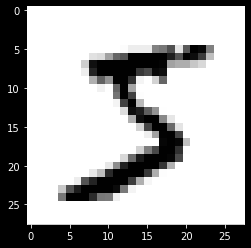

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

#### load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
#### Preprocessing - normalization and OHE

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.7325 - accuracy: 0.7985 - val_loss: 0.1663 - val_accuracy: 0.9523
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1718 - accuracy: 0.9503 - val_loss: 0.1318 - val_accuracy: 0.9615
Epoch 3/10
422/422 [==============================] - 1s 4ms/step - loss: 0.1179 - accuracy: 0.9652 - val_loss: 0.1035 - val_accuracy: 0.9720
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 5/10
422/422 [==============================] - 1s 4ms/step - loss: 0.0653 - accuracy: 0.9803 - val_loss: 0.0879 - val_accuracy: 0.9757
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0802 - val_accuracy: 0.9773
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0421 - accuracy: 0.9880 - val_loss: 0.0822 - val_accuracy: 0.9780
Epoch 

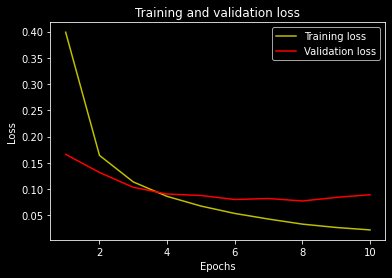

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see above, without `dropout`, the validation loss stops decreasing around epoch `3` - which means after that the model starts __overfitting__.

Now we can start adding the `Dropout` layers into the model.

In [ ]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
#### 0.5 means we random throw out 50% of the weights learnt
#### so that the model training is more difficult
#### hence it is harder to overfit the model
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 128)              

In [ ]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)


Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2217 - accuracy: 0.9371 - val_loss: 0.1097 - val_accuracy: 0.9680
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2017 - accuracy: 0.9417 - val_loss: 0.1032 - val_accuracy: 0.9712
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1905 - accuracy: 0.9448 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1803 - accuracy: 0.9477 - val_loss: 0.0941 - val_accuracy: 0.9727
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1722 - accuracy: 0.9492 - val_loss: 0.0921 - val_accuracy: 0.9732
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9518 - val_loss: 0.0883 - val_accuracy: 0.9747
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1551 - accuracy: 0.9547 - val_loss: 0.0868 - val_accuracy: 0.9753
Epoch 

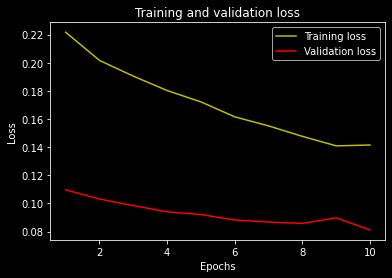

In [ ]:
#### plot the training history again
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can observe that with the help of the `Dropout` layers, the validation loss keeps decreasing even at epoch 10. Thus, we successfully fought the overfitting problem.



### Early Stopping

- But we may think of: how about we select a large number of epochs, so that we can reach the __best__ performance of our model? Sure we can.  
- But in the meanwhile, if we increase the number of epochs too much, we may run into the overfitting problem again, even with the `Dropout` layers.
- So we can use __early stopping__.

- The idea behind __early stopping__ is straightforward.
  - We have `keras` monitor the selected metric(s) (e.g., validation loss),
  - if it stop change in the desired direction (e.g., decreasing), we stop the training process.
  - Sicne the training process does not complete, it is an __early__ stop.

In [ ]:
model_es = Sequential()
model_es.add(Flatten(input_shape=(28, 28)))
model_es.add(Dense(128))
model_es.add(Dropout(0.5))
model_es.add(Activation('relu'))
model_es.add(Dense(128))
model_es.add(Dropout(0.5))
model_es.add(Activation('relu'))
model_es.add(Dense(10))
model_es.add(Activation('softmax'))
model_es.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)              

In [ ]:
model_es.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#### simple early stopping
from keras.callbacks import EarlyStopping
#### we specify to monitor validation loss
#### `min` means if `val_loss` stops decreasing
#### and `patience` means number of epochs after `val_loss` stops decreasing
#### we use `patience` to avoid stopping training at local minima
#### particularly when use in combination with `Dropout`
#### you shoud definitely use `patience`
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
#### now we can try 100 epochs

history_es = model_es.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    verbose = 1,
    shuffle=True,
    callbacks=[es]
)


Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2656 - accuracy: 0.9236 - val_loss: 0.1221 - val_accuracy: 0.9647
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2332 - accuracy: 0.9330 - val_loss: 0.1111 - val_accuracy: 0.9677
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2128 - accuracy: 0.9391 - val_loss: 0.1033 - val_accuracy: 0.9698
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1964 - accuracy: 0.9428 - val_loss: 0.0941 - val_accuracy: 0.9720
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1846 - accuracy: 0.9454 - val_loss: 0.0918 - val_accuracy: 0.9725
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1715 - accuracy: 0.9488 - val_loss: 0.0881 - val_accuracy: 0.9752
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9526 - val_loss: 0.0873 - val_accuracy: 0.9745

Notice `val_loss` start increasing after epoch 22? `keras` continued to train `model_es` for 5 epochs (epoch 27), but the best model state at epoch 22 is saved.

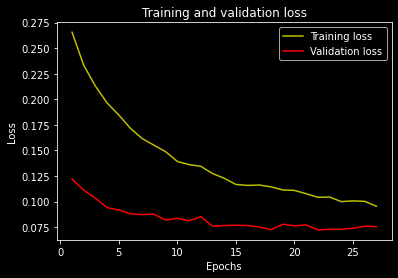

In [ ]:
#### plot the training history again
loss = history_es.history['loss']
val_loss = history_es.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Weight Decay

- Additionally, we can use weight decay to restrain the model from overfitting.
- There are three types of weight decay in `keras`:
  - l1: Activity is calculated as the sum of absolute values.
  - l2: Activity is calculated as the sum of the squared values.
  - l1_l2: Activity is calculated as the sum of absolute and sum of the squared values.


In [ ]:
# import regularizer
from keras.regularizers import l1, l2, l1_l2

model_l1 = Sequential()
model_l1.add(Flatten(input_shape=(28, 28)))
model_l1.add(Dense(128, activation='relu', activity_regularizer=l1(0.001)))
model_l1.add(Dropout(0.5))
model_l1.add(Dense(128, activation='relu', activity_regularizer=l1(0.001)))
model_l1.add(Dropout(0.5))
model_l1.add(Dense(10))
model_l1.add(Activation('softmax'))
model_l1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_12 (Activation)   (None, 10)               

In [ ]:
model_l1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history_l1 = model_l1.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    verbose = 1,
    shuffle=True,
    callbacks=[es]
)

Epoch 1/100
422/422 [==============================] - 3s 5ms/step - loss: 1.1784 - accuracy: 0.6380 - val_loss: 0.2662 - val_accuracy: 0.9405
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 0.4138 - accuracy: 0.8993 - val_loss: 0.2033 - val_accuracy: 0.9585
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 0.3328 - accuracy: 0.9215 - val_loss: 0.1770 - val_accuracy: 0.9643
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2950 - accuracy: 0.9305 - val_loss: 0.1625 - val_accuracy: 0.9690
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2620 - accuracy: 0.9387 - val_loss: 0.1473 - val_accuracy: 0.9705
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2431 - accuracy: 0.9437 - val_loss: 0.1417 - val_accuracy: 0.9728
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 0.2242 - accuracy: 0.9471 - val_loss: 0.1369 - val_accuracy: 0.9740

We can observe that `model_l1` is trained for 30 epochs, although the model performance did not improve. So regularizations do not guarantee better performance, but we do get a better shot at __global optimum__.

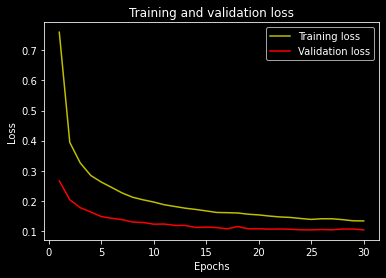

In [ ]:
#### plot the training history again
loss = history_l1.history['loss']
val_loss = history_l1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Judging by the figure above, we can see that the L1-regualrization makes the training curve __smoother__, which is desired.

If you want to learn to how use other types of regularizations, or use regularizations in other types of NNs, refer to [this article](https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/).

# Deep Learning & Artificial Intelligence
## Neural Networks Building Blocks - Loss Functions, Optimizers, and Activations
### Dr. Jie Tao, Fairfield University